# Runge Kutta Approximation for Oscillator

Range Kutta approximation can be done on a pendulum given by the differential equations.
$$
-\frac{g}{l} sin{\theta} = \ddot{\theta}
$$

This is can be expressed as the following:
$$
    q_1 = \theta
$$
$$
    q_2 = \dot{\theta}
$$

Now we can write it as the following:
$$
    \dot{q_1} = q_2
$$
$$
    \dot{q_2} = -\frac{g}{l} sin(q_1)
$$

In [30]:
# Importing the necessary Python libraries
import numpy as np
import math as mt
import matplotlib.pyplot as plt


Text(0, 0.5, "$\\theta'$")

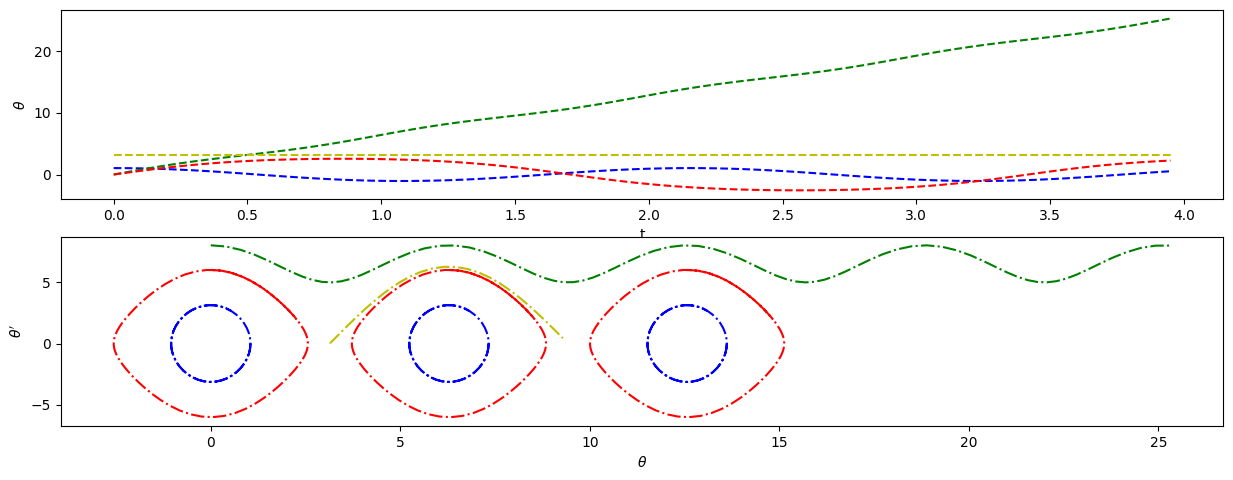

In [42]:
g = 9.8
l = 1

def DifferentialForPendulum(y, y_dot, x):
    return {"q1":y_dot, "q2":-(g/l)*mt.sin(y)}

def SimulatedFuncValues(x_values, h, q1_0, q2_0, differential):
    q1_val = np.zeros_like(x_values)
    q2_val = np.zeros_like(x_values)
    
    q1_val[0] = q1_0
    q2_val[0] = q2_0
    for i in range(1, len(x_values)):
        k1 = differential(q1_val[i-1], q2_val[i-1], x_values[i-1])
        k2 = differential(q1_val[i-1] + (h/2)*k1["q1"] , q2_val[i-1] + (h/2)*k1["q2"],  x_values[i-1]+(h/2))
        k3 = differential(q1_val[i-1] + (h/2)*k2["q1"], q2_val[i-1] + (h/2)*k2["q2"], x_values[i-1]+(h/2))
        k4 = differential(q1_val[i-1] + h*k3["q1"] , q2_val[i-1] + (h)*k3["q2"], x_values[i-1]+h)
        q1_val[i] = q1_val[i-1] + ((k1["q1"] + 2*k2["q1"] + 2*k3["q1"] + k4["q1"])/6)*h
        q2_val[i] = q2_val[i-1] + ((k1["q2"] + 2*k2["q2"] + 2*k3["q2"] + k4["q2"])/6)*h
    return (q1_val, q2_val)

x_values = np.arange(0,4,0.05)

fig, ax = plt.subplots(2, figsize=(15, 5.4))
ax[0].plot(x_values, SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3), q2_0=0, differential=DifferentialForPendulum)[0], '--b')
ax[0].plot(x_values, SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=8, differential=DifferentialForPendulum)[0], '--g')
ax[0].plot(x_values, SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=6, differential=DifferentialForPendulum)[0], '--r')
ax[0].plot(x_values, SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=mt.pi, q2_0=0, differential=DifferentialForPendulum)[0], '--y')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3), q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3), q2_0=0, differential=DifferentialForPendulum)[1],
    '-.b')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=8, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=8, differential=DifferentialForPendulum)[1],
    '-.g')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=6, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=0, q2_0=6, differential=DifferentialForPendulum)[1],
    '-.r')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=4*mt.pi, q2_0=6, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=4*mt.pi, q2_0=6, differential=DifferentialForPendulum)[1],
    '-.r')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 4*mt.pi, q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 4*mt.pi, q2_0=0, differential=DifferentialForPendulum)[1],
    '-.b')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=2*mt.pi, q2_0=6, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=2*mt.pi, q2_0=6, differential=DifferentialForPendulum)[1],
    '-.r')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 2*mt.pi, q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi/3) + 2*mt.pi, q2_0=0, differential=DifferentialForPendulum)[1],
    '-.b')
ax[1].plot(
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi)+0.001, q2_0=0, differential=DifferentialForPendulum)[0],
    SimulatedFuncValues(x_values=x_values, h=0.05, q1_0=(mt.pi)+0.001, q2_0=0, differential=DifferentialForPendulum)[1],
    '-.y')

ax[0].set_xlabel("t")
ax[0].set_ylabel(r"$\theta$")
ax[1].set_xlabel(r"$\theta$")
ax[1].set_ylabel(r"$\theta'$")
# ax[0].legend()
